# Descriptive Statistics   . 

In this notebook, I will perform descriptive statistics, which is a branch of statistics that focuses on describing, summarizing, interpreting, and presenting data, enabling us to have a deeper understanding of the data at hand.

**About the dataset**
In this project I leverage Social media vs productivity dataset which explores how daily digital habits— including social media usage,screen time, and notification exposure, relate to individual productivity, stress, and well-being.

In [1]:
#Import python libraries to perform descriptive statistics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Load the dataset
data = pd.read_csv('/kaggle/input/social-media-vs-productivity/social_media_vs_productivity.csv')
data.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
0,56,Male,Unemployed,4.180940,Facebook,61,6.753558,8.040464,7.291555,4.0,5.116546,0.419102,8,False,False,4,11,21.927072,6.336688
1,46,Male,Health,3.249603,Twitter,59,9.169296,5.063368,5.165093,7.0,5.103897,0.671519,7,True,True,2,25,0.000000,3.412427
2,32,Male,Finance,NaN,Twitter,57,7.910952,3.861762,3.474053,4.0,8.583222,0.624378,0,True,False,3,17,10.322044,2.474944
3,60,Female,Unemployed,NaN,Facebook,59,6.355027,2.916331,1.774869,6.0,6.052984,1.204540,1,False,False,0,4,23.876616,1.733670
4,25,Male,IT,NaN,Telegram,66,6.214096,8.868753,NaN,7.0,5.405706,1.876254,1,False,True,1,30,10.653519,9.693060


In [3]:
#Check the # of missing values per column
No_of_missing_vals = data.isnull().sum()
No_of_missing_vals

age                                  0
gender                               0
job_type                             0
daily_social_media_time           2765
social_platform_preference           0
number_of_notifications              0
work_hours_per_day                   0
perceived_productivity_score      1614
actual_productivity_score         2365
stress_level                      1904
sleep_hours                       2598
screen_time_before_sleep          2211
breaks_during_work                   0
uses_focus_apps                      0
has_digital_wellbeing_enabled        0
coffee_consumption_per_day           0
days_feeling_burnout_per_month       0
weekly_offline_hours                 0
job_satisfaction_score            2730
dtype: int64

In [4]:
#Total missing values
No_of_cells = np.product(data.shape)
total_missing = No_of_missing_vals.sum()

#Percentage of missing data
percentage = (total_missing/No_of_cells)*100
print(percentage)

2.8398245614035087


In the next step, I am going to take a closer look at some of the columns with missing values and try to figure out what might be the cause of missing data.

In [5]:
#Remove rows with missing values
data1 = data.dropna()
data1

,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
0,56,Male,Unemployed,4.180940,Facebook,61,6.753558,8.040464,7.291555,4.0,5.116546,0.419102,8,False,False,4,11,21.927072,6.336688
1,46,Male,Health,3.249603,Twitter,59,9.169296,5.063368,5.165093,7.0,5.103897,0.671519,7,True,True,2,25,0.000000,3.412427
6,56,Female,Unemployed,4.381070,TikTok,60,3.902309,6.420989,5.976408,7.0,7.549849,2.252624,4,False,False,4,20,24.084905,5.501373
7,36,Female,Education,4.089168,Twitter,49,6.560467,2.681830,2.446927,4.0,6.325507,0.747998,2,False,False,4,29,8.419648,3.444376
10,28,Male,IT,3.341559,Twitter,57,11.022035,8.940636,7.983252,4.0,3.952547,1.028640,5,True,True,1,3,13.514515,9.414637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29988,34,Male,IT,3.562316,Twitter,59,7.685305,3.233504,2.932739,9.0,5.689819,2.333739,2,False,False,1,30,3.687407,2.123211
29992,44,Female,Unemployed,1.648825,TikTok,39,6.547262,5.900434,5.164050,9.0,8.803968,0.305591,9,True,False,2,1,24.743560,6.073588
29996,39,Male,Health,4.437784,Instagram,46,4.692862,8.133213,6.659294,8.0,3.045393,0.148936,3,False,False,1,29,4.111370,6.155613
29997,42,Male,Education,17.724981,TikTok,64,10.915036,8.611005,8.658912,5.0,5.491520,1.224296,10,False,False,1,2,1.888315,6.285237


In [6]:
#Identify and remove duplicate rows or columns to ensure data integrity
duplicate = data1.duplicated(subset=data1[:], keep=False)

duplicate1 = data1[data1.duplicated()]
print(duplicate1) #No duplicate values across columns

Empty DataFrame
Columns: [age, gender, job_type, daily_social_media_time, social_platform_preference, number_of_notifications, work_hours_per_day, perceived_productivity_score, actual_productivity_score, stress_level, sleep_hours, screen_time_before_sleep, breaks_during_work, uses_focus_apps, has_digital_wellbeing_enabled, coffee_consumption_per_day, days_feeling_burnout_per_month, weekly_offline_hours, job_satisfaction_score]
Index: []


In [7]:
#Check and correct data types
data2 = data1.dtypes
data2

age                                 int64
gender                             object
job_type                           object
daily_social_media_time           float64
social_platform_preference         object
number_of_notifications             int64
work_hours_per_day                float64
perceived_productivity_score      float64
actual_productivity_score         float64
stress_level                      float64
sleep_hours                       float64
screen_time_before_sleep          float64
breaks_during_work                  int64
uses_focus_apps                      bool
has_digital_wellbeing_enabled        bool
coffee_consumption_per_day          int64
days_feeling_burnout_per_month      int64
weekly_offline_hours              float64
job_satisfaction_score            float64
dtype: object

In [8]:
#Outlier detection and treatment, remove, cap, or transform outliers
integer_columns = data1.select_dtypes(include=['int64']).columns
integer_columns

Index(['age', 'number_of_notifications', 'breaks_during_work',
       'coffee_consumption_per_day', 'days_feeling_burnout_per_month'],
      dtype='object')

AGE COLUMN: minimum age= 18 median age= 41.0 maximum age= 65
NOTIFICATION COLUMN: minimum notification= 32 median_notification= 60.0 maximum_notification= 90
BREAK COLUMN: minimum break= 0 median break= 5.0 maximum break= 10
COFFEE COLUMN: minimum coffee= 0 median coffee= 2.0 maximum coffee= 9
BURNOUT COLUMN: minimum burnout= 0 median burnout= 16.0 maximum burnout= 31



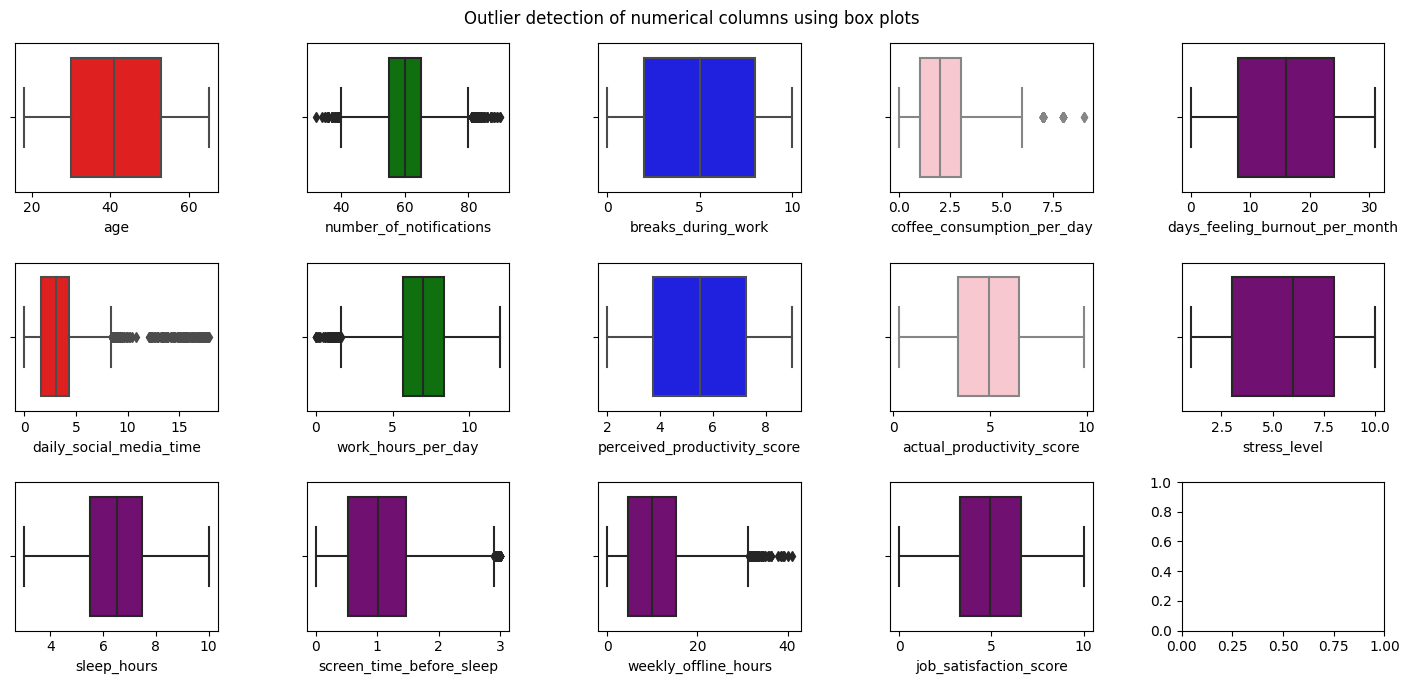

In [9]:
#Detect outliers by visualising each numerical column(s) using box plots
fig, axes = plt.subplots(3,5, figsize=(15,7))
axes = axes.flatten()
plt.tight_layout(pad=3.0)

#Title
plt.suptitle('Outlier detection of numerical columns using box plots')

sns.boxplot(x=data1['age'], ax=axes[0], color='red')
sns.boxplot(x=data1['number_of_notifications'], ax=axes[1], color='green')
sns.boxplot(x=data1['breaks_during_work'], ax=axes[2], color='blue')
sns.boxplot(x=data1['coffee_consumption_per_day'], ax=axes[3], color='pink')
sns.boxplot(x=data1['days_feeling_burnout_per_month'], ax=axes[4], color='purple')

sns.boxplot(x=data1['daily_social_media_time'], ax=axes[5], color='red')
sns.boxplot(x=data1['work_hours_per_day'], ax=axes[6], color='green')
sns.boxplot(x=data1['perceived_productivity_score'], ax=axes[7], color='blue')
sns.boxplot(x=data1['actual_productivity_score'], ax=axes[8], color='pink')
sns.boxplot(x=data1['stress_level'], ax=axes[9], color='purple')
sns.boxplot(x=data1['sleep_hours'], ax=axes[10], color='purple')
sns.boxplot(x=data1['screen_time_before_sleep'], ax=axes[11], color='purple')
sns.boxplot(x=data1['weekly_offline_hours'], ax=axes[12], color='purple')
sns.boxplot(x=data1['job_satisfaction_score'], ax=axes[13], color='purple')

#Age column
minimum_age = data1['age'].min()
maximum_age = data1['age'].max()
median_age = data1['age'].median()

#No of notifications column
minimum_notification = data1['number_of_notifications'].min()
maximum_notification = data1['number_of_notifications'].max()
median_notification = data1['number_of_notifications'].median()

#Breaks during work column
minimum_break = data1['breaks_during_work'].min()
maximum_break = data1['breaks_during_work'].max()
median_break = data1['breaks_during_work'].median()

#coffee_consumption_per_day
minimum_coffee = data1['coffee_consumption_per_day'].min()
maximum_coffee = data1['coffee_consumption_per_day'].max()
median_coffee = data1['coffee_consumption_per_day'].median()

#days_feeling_burnout_per_month
minimum_burnout = data1['days_feeling_burnout_per_month'].min()
maximum_burnout = data1['days_feeling_burnout_per_month'].max()
median_burnout = data1['days_feeling_burnout_per_month'].median()

print('AGE COLUMN:','minimum age=',minimum_age,'median age=',median_age, 'maximum age=', maximum_age)
print('NOTIFICATION COLUMN:','minimum notification=',minimum_notification,'median_notification=',median_notification, 'maximum_notification=', maximum_notification)
print('BREAK COLUMN:','minimum break=',minimum_break,'median break=',median_break, 'maximum break=', maximum_break)
print('COFFEE COLUMN:','minimum coffee=',minimum_coffee,'median coffee=',median_coffee, 'maximum coffee=', maximum_coffee)
print('BURNOUT COLUMN:','minimum burnout=',minimum_burnout,'median burnout=',median_burnout, 'maximum burnout=', maximum_burnout)
print()

In [10]:
#Displaying float columns
float_columns = data1.select_dtypes(include=['float64']).columns
float_columns

Index(['daily_social_media_time', 'work_hours_per_day',
       'perceived_productivity_score', 'actual_productivity_score',
       'stress_level', 'sleep_hours', 'screen_time_before_sleep',
       'weekly_offline_hours', 'job_satisfaction_score'],
      dtype='object')

In [11]:
#Displaying string columns
string_columns = data1.select_dtypes(include=['object']).columns
string_columns

Index(['gender', 'job_type', 'social_platform_preference'], dtype='object')

**1. Measures of Central tendency**
These indicates where the center or typical value for a probability distribution. They include Mean (Average), Median (Middle value), and Mode (frequently occuring value(s). *Questions*. 1.What is the average perceived and actual productivity score?. 2. What is the most common social platform among users?. 3. What is the median number of notifications per day? 4.  What is the average sleep duration for people with high vs. low stress?

average perceived prod score= 5.505522624120552
average actual prod score= 4.944529790490153
difference= 0.56


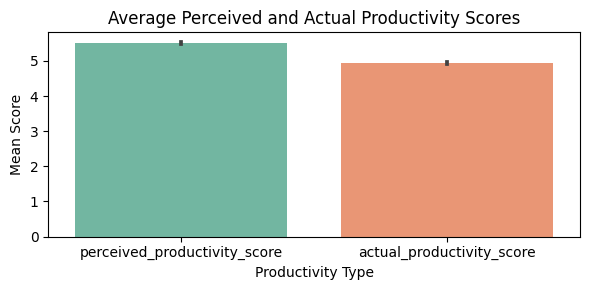

In [12]:
#q1.What is the average perceived and actual productivity score?.
average_perceived_prod_score = data1['perceived_productivity_score'].mean()
average_actual_prod_score = data1['actual_productivity_score'].mean()
print('average perceived prod score=',average_perceived_prod_score)
print('average actual prod score=', average_actual_prod_score )

#Calculating the difference of the means
diff = round(abs(average_perceived_prod_score - average_actual_prod_score),2)
print('difference=', diff)
#Visualising the mean
df_melted = data1[['perceived_productivity_score', 'actual_productivity_score']].melt(
    var_name='Productivity Type',
    value_name='Score'
)

# Plotting
plt.figure(figsize=(6, 3))
plt.title('Average Perceived and Actual Productivity Scores')

sns.barplot(x='Productivity Type', y='Score', data=df_melted, estimator='mean', palette='Set2')
plt.ylabel('Mean Score')
plt.xlabel('Productivity Type')
plt.tight_layout()
plt.show() 

**Explanation**
The average perceived productivity score is greater than average actual productivity score. This means that social media users tend to overestimate their own productivity.

social_platform_preference
TikTok       3497
Twitter      3436
Instagram    3401
Telegram     3375
Facebook     3365
Name: count, dtype: int64


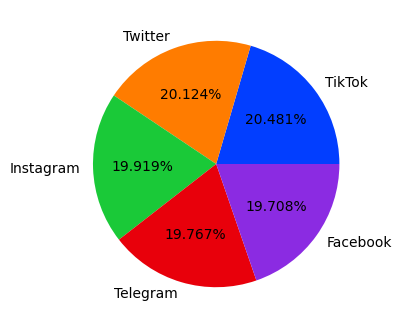

In [13]:
#q2. What is the most common social media platform among users?
platform = data1['social_platform_preference'].unique()
platforms = data1['social_platform_preference'].value_counts()
print(platforms)

#Visualising in pie chart
plt.figure(figsize=(8,4))

#Distribution of social media usage
palette_color = sns.color_palette('bright')
plt.pie(platforms, labels=['TikTok','Twitter','Instagram','Telegram','Facebook'], colors = palette_color, autopct='%.3f%%')
plt.show()

**Explanation**
Tiktok is the most common/preferred social media platform among users.

minimum= 32 maximum = 90
The standard deviation= 7.788586599388393
The mean= 59.974288391706686 The median= 60.0


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: title={'center': 'Distribution of the number of notifications'}, xlabel='number_of_notifications', ylabel='Count'>

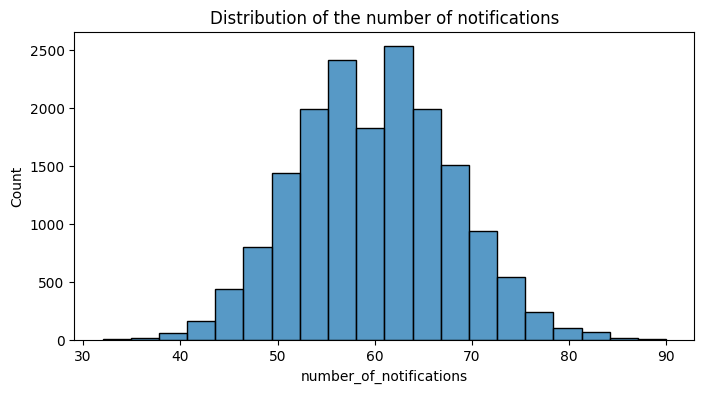

In [14]:
#q3. What is the median number of notifications per day?
notifications = data1['number_of_notifications']
median = notifications.median()
minimum = notifications.min()
maximum = notifications.max()
print('minimum=', minimum, 'maximum =', maximum)
standard_deviation = notifications.std()
print('The standard deviation=',standard_deviation)
mean = notifications.mean()
print('The mean=',mean, 'The median=', median)


plt.figure(figsize=(8,4))
plt.title('Distribution of the number of notifications')

sns.histplot(notifications, kde=False, bins=20)

**Explanation**
The median number of notifications is 60 and the mean is 59.97, therefore, on average users receive about 60 notifications per day. 

Average sleep duration for high stress= 6.512738317663982 Average sleep duration for low stress= 6.487356346141169


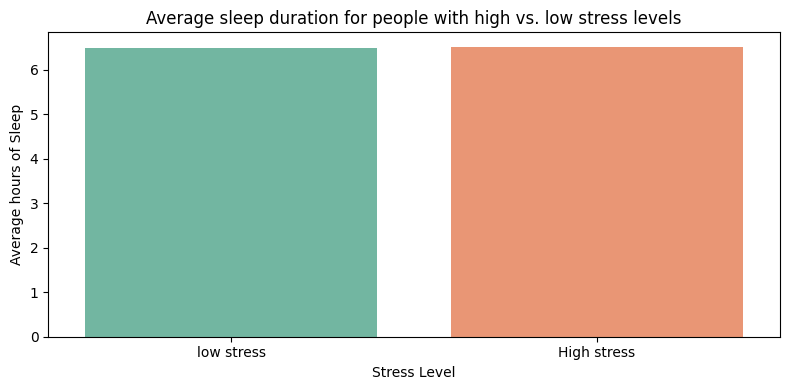

In [15]:
#q4. What is the average sleep duration for people with high vs. low stress?
data2 = data1.loc[:,['stress_level', 'sleep_hours']]
low_stress = data2.loc[data2.stress_level ==1.0]
high_stress = data2.loc[data2.stress_level ==10.0]

Avgsleepdur_low_stress = low_stress['sleep_hours'].mean()
Avgsleepdur_high_stress = high_stress['sleep_hours'].mean()

frame = {
    'low stress':[Avgsleepdur_low_stress],
    'High stress':[Avgsleepdur_high_stress]
}

df = pd.DataFrame(frame)
print('Average sleep duration for high stress=',Avgsleepdur_high_stress, 'Average sleep duration for low stress=',Avgsleepdur_low_stress )

df_melted = df.melt(var_name='Stress Level', value_name='Average Sleep Duration')
#Visualising average stress levels for people with high vs. low stress levels
plt.figure(figsize=(8,4))
plt.title('Average sleep duration for people with high vs. low stress levels')

sns.barplot(data=df_melted, x='Stress Level', y='Average Sleep Duration', palette='Set2')
plt.ylabel('Average hours of Sleep')
plt.tight_layout()
plt.show()

**Explanation**
Average sleep duration for *high stress people= 6.512738317663982* and Average sleep duration for *low stress people= 6.487356346141169*

**2.	Measures of Variability (Spread)**
Quantify the spread or dispersion of data points in a dataset.They include Range-*difference between maximum and minimum value(s)*, Inter quartile range(IQR) -*difference between upper quartile(Q3) and lower quartile(Q1)*, Variance-*Average squared deviation from the mean*, Standard deviation-*Square root of the variance*. *Question*.1.How variable is coffee consumption among different job types? 2. What is the range and standard deviation in daily social media usage? 3. How much variability in work hours exists across genders?

In [16]:
#q1. How variable is coffee consumption among different job types?
Unemployed = data1.loc[(data1.job_type =='Unemployed') & (data1.coffee_consumption_per_day)]
Health = data1.loc[(data1.job_type =='Health') & (data1.coffee_consumption_per_day)]
Education = data1.loc[(data1.job_type =='Education') & (data1.coffee_consumption_per_day)]
IT = data1.loc[(data1.job_type =='IT') & (data1.coffee_consumption_per_day)]
Student = data1.loc[(data1.job_type =='Student') & (data1.coffee_consumption_per_day)]
Finance = data1.loc[(data1.job_type =='Finance') & (data1.coffee_consumption_per_day)]

Unemployed1 = Unemployed.loc[:,['coffee_consumption_per_day', 'job_type']]
Health1 = Health.loc[:,['coffee_consumption_per_day', 'job_type']]
Education1 = Education.loc[:,['coffee_consumption_per_day', 'job_type']]
IT1 = IT.loc[:,['coffee_consumption_per_day', 'job_type']]
Student1 = Student.loc[:,['coffee_consumption_per_day', 'job_type']]
Finance1 = Finance.loc[:,['coffee_consumption_per_day', 'job_type']]

#Standard deviations
std_Unemplod = Unemployed1['coffee_consumption_per_day'].std()
std_Health = Health1['coffee_consumption_per_day'].std()
std_Education = Education1['coffee_consumption_per_day'].std()
std_IT = IT1['coffee_consumption_per_day'].std()
std_Student = Student1['coffee_consumption_per_day'].std()
std_Finance = Finance1['coffee_consumption_per_day'].std()

print(f'Unemployed std:{std_Unemplod}\n Health std:{std_Health}\n Education std:{std_Education}\n IT std:{std_IT}\n Student std:{std_Student}\n Finance std:{std_Finance}')

Unemployed std:1.3136996446253377
 Health std:1.3686303267848654
 Education std:1.3533873932170903
 IT std:1.36512265079779
 Student std:1.2901681532983107
 Finance std:1.319558111091669


**Interpretation**

1. The Health, IT, and Education sectors show the highest variability in coffee consumption, with standard deviations slightly above 1.35.

-This suggests that people in these fields have diverse coffee habits, some may drink a lot, others very little.

2. Finance and Unemployed individuals show moderate variability, slightly lower than the above groups.

-Their coffee habits are somewhat more consistent across individuals.

3. Students show the least variability in coffee consumption.

-This may indicate more uniform habits, perhaps due to shared routines or limited budgets.

In [17]:
#q2. What is the range and standard deviation in daily social media usage?
social_usage = data1['daily_social_media_time']
#Range
Range = social_usage.max() - social_usage.min()
std = social_usage.std()
print(f'Range of social media usage={Range}\n Standard deviation of social media usage={std}')

Range of social media usage=17.817948297796974
 Standard deviation of social media usage=2.0802566756073033


**Explanation**
*Range*
The person with the highest daily social media usage spent about 17.82 more hours per day than the person with the lowest usage.  This suggests there's a very wide spread in how much time different people spend on social media, some barely use it, while others might use it nearly all day.

*Standard deviation*
On average, individual social media usage values differ from the mean by about 2.08 hours. This suggests a moderate level of variability. While there's a wide overall range (17+ hours), most people’s usage probably clusters within a few hours of the average.

In [18]:
#q3. How much variability in work hours exists across genders?
data4 = data1.loc[:,['gender','work_hours_per_day']]
Male = data4.loc[(data4.gender =='Male') & (data4.work_hours_per_day)]
Female = data4.loc[(data4.gender =='Female') & (data4.work_hours_per_day)]
Other = data4.loc[(data4.gender =='Other') & (data4.work_hours_per_day)]

#Range
Male_range = Male.work_hours_per_day.max() - Male.work_hours_per_day.min()
Female_range = Female.work_hours_per_day.max() - Female.work_hours_per_day.min()
Other_range = Other.work_hours_per_day.max() - Other.work_hours_per_day.min()

#Standard deviation
Male_std = Male.work_hours_per_day.std()
Female_std = Female.work_hours_per_day.std()
Other_std = Other.work_hours_per_day.std()

print(f'Male range={Male_range}\n Female range={Female_range}\n Other range={Other_range}\n Male std={Male_std}\n Female std={Female_std}\n Other std={Other_std}')

Male range=11.780022757861325
 Female range=11.862131060258001
 Other range=10.924208556062402
 Male std=2.014740570853737
 Female std=1.9734649258699042
 Other std=1.9455656275447286


**Explanation**

*Range*
Female group has the highest range (≈11.86 hrs), slightly higher than males (≈11.78 hrs). Other gender group has the smallest range (≈10.92 hrs). All three gender groups show a similar maximum spread in work hours, about 11 to 12 hours between the most and least hours worked daily. This indicates wide variability across all genders.

*Standard deviation*
Male group has the highest standard deviation (2.015), followed by females (1.973), and others (1.946). While ranges are similar, males show slightly more day-to-day or person-to-person variability around the average number of work hours.
Other gender group has the most consistent work hours, with the smallest deviation.

**3.	Measures of Position**
Describe the position of a data value within a dataset relative to other values. They include Percentiles- divide a ranked dataset into 100 equal parts, Quartiles - divide a dataset into four equal parts, Deciles - divide a dataset into ten equal parts. *Questions*. 1. What is the 25th, 50th, and 75th percentile of screen time before sleep? 2. Who are in the top 10% in productivity? 3. How many standard deviations is a user's productivity from the mean (Z-score)?

In [19]:
#q1. What is the 25th, 50th, and 75th percentile of screen time before sleep?
percentiles = data1['screen_time_before_sleep'].quantile([0.25, 0.5, 0.75])
print(f'Percentiles={percentiles}')

Percentiles=0.25    0.526338
0.50    1.010674
0.75    1.473942
Name: screen_time_before_sleep, dtype: float64


In [20]:
#q2. Who are in the top 10% in productivity?
decile1 = data1['actual_productivity_score'].quantile(0.10)
print(decile1)

2.396519791920223


**4.	Frequency Distribution **

Organize and summarize data by showing how often each value or category occurs in a dataset. Categorical, Counts.

Text(0, 0.5, 'Count')

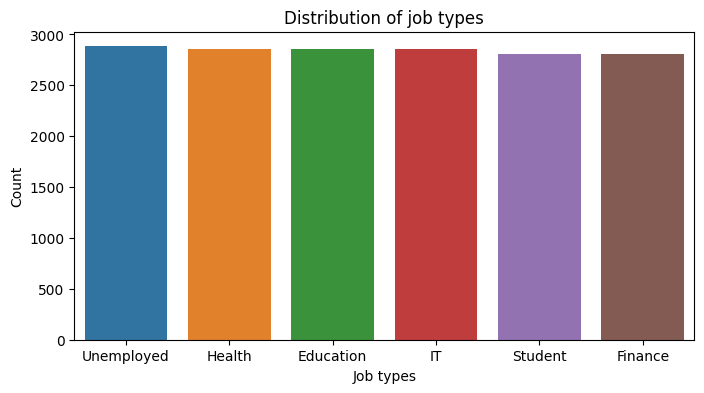

In [21]:
#q1. What’s the distribution of job types in the dataset?
Job_types = data1['job_type'].unique()
counts = data1['job_type'].value_counts()
plt.figure(figsize=(8,4))
plt.title('Distribution of job types')

sns.barplot(x=Job_types, y=counts.values)
plt.xlabel('Job types')
plt.ylabel('Count')

No of people using focus apps=uses_focus_apps
True    5119
Name: count, dtype: int64
 No of people not using focus apps=uses_focus_apps
False    11955
Name: count, dtype: int64


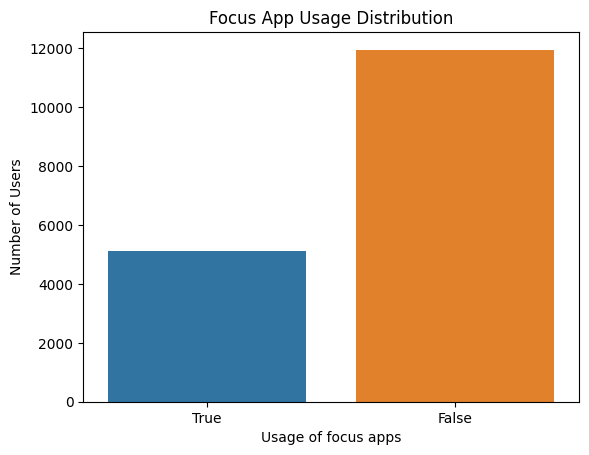

In [22]:
#q2. How many people use focus apps vs. don’t?
use = data1.loc[(data1.uses_focus_apps ==True)]
Not_use = data1.loc[(data1.uses_focus_apps ==False)]
use1 = use['uses_focus_apps'].value_counts()
use2 = Not_use['uses_focus_apps'].value_counts()
print(f'No of people using focus apps={use1}\n No of people not using focus apps={use2}')

# Combine counts into a new DataFrame for plotting
df_plot = pd.DataFrame({
    'Usage': ['True', 'False'],
    'Count': [use1.get(True, 0), use2.get(False, 0)]
})

# Plot
sns.barplot(x='Usage', y='Count', data=df_plot)
plt.title('Focus App Usage Distribution')
plt.ylabel('Number of Users')
plt.xlabel('Usage of focus apps')
plt.show()

**Explanation**

There is a significantly larger number of people not using focus apps than those who are.


No of times they are reported=stress_level
1.0     1699
2.0     1664
3.0     1713
4.0     1717
5.0     1668
6.0     1774
7.0     1729
8.0     1730
9.0     1639
10.0    1741
Name: count, dtype: int64


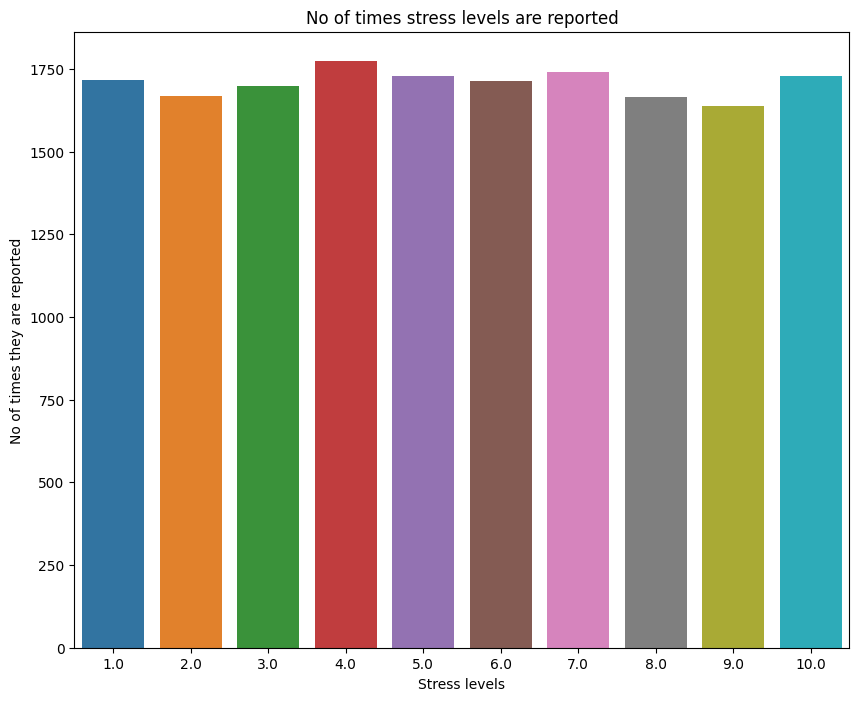

In [23]:
#q3. How often is each stress level (1–10) reported?
reported = data1['stress_level'].value_counts().sort_index()
reported1 = data1['stress_level'].unique()
reported2 = data1['stress_level'].value_counts()
plt.figure(figsize=(10,8))
plt.title('No of times stress levels are reported')

sns.barplot(x=reported1, y=reported2.values)
plt.xlabel('Stress levels')
plt.ylabel('No of times they are reported')

print(f'No of times they are reported={reported}')

**5.	Shape of Distribution**

This describes how the dataset is distributed. They include *Skweness*- Describes the asymmetry of the a distribution around its mean ,*Zero Skewness (Symmetrical Distribution)=0*:The left and right sides of the distribution are mirror images; Mean ≈ Median ≈ Mode, Example: A perfect normal distribution. *Positive Skew*>0: The tail is longer on the right;Most values are concentrated on the left. *Negative Skew*<0: The tail is longer on the left;Most values are concentrated on the right;Mean < Median < Mode. 

*Kurtosis*
Describes the tailedness of a distribution, in other words, how heavy or light the tails are compared to a normal distribution. Types of Kurtosis, *Mesokurtic (Kurtosis ≈ 3)*- Normal distribution;Moderate tails i.e Bell-shaped curve. *Leptokurtic (Kurtosis > 3)*- Heavy tails and sharp peak;More outliers than a normal distribution. *Platykurtic (Kurtosis < 3)*- Light tails and flatter peak, Fewer outliers i.e Uniform distribution.

*Questions*
Is the distribution of social media time skewed?.Does the distribution of burnout days show signs of outliers or heavy tails?What’s the distribution shape of sleep hours?

Skweness: 1.2338921884646936
True
Mean: 3.122574768195546 Median: 3.0364248184021982


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


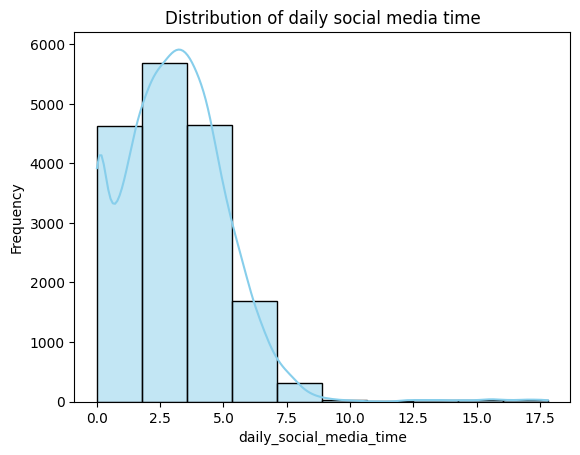

In [24]:
#q1. Is the distribution of social media time skewed?
Smedia_time = data1['daily_social_media_time'].skew()
print('Skweness:', Smedia_time)
mean = data1['daily_social_media_time'].mean()
median = data1['daily_social_media_time'].median()
print(mean > median)
print('Mean:',mean, 'Median:',median)

sns.histplot(data1['daily_social_media_time'], kde=True, bins=10, color='skyblue')
plt.title('Distribution of daily social media time')
plt.ylabel('Frequency')
plt.show()

**Explanation**

It is *positively skewed*: there's a long tail extending to the right toward 10+ hours, indicating a small number of people who use social media excessively. This means some users spend a significantly higher amount of time on social media, pulling the tail to the right. Most people spend a moderate amount of time on social media, but a few heavy users increase the average and stretch the distribution rightward.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


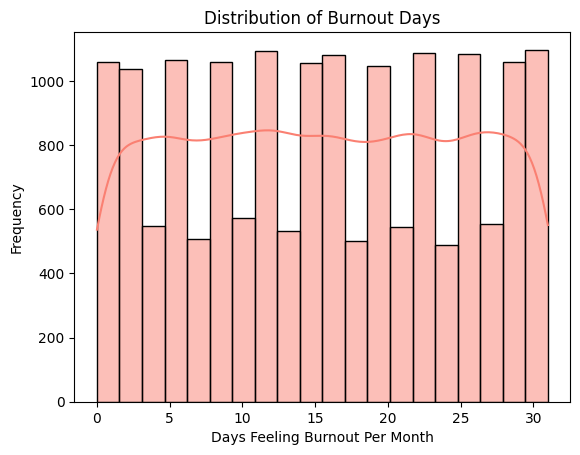

In [25]:
#q2. Does the distribution of burnout days show signs of outliers or heavy tails?
from scipy.stats import kurtosis
kurt =  kurtosis(data1['days_feeling_burnout_per_month'], fisher=False, bias=False)

sns.histplot(data1['days_feeling_burnout_per_month'], kde=True, bins=20, color='salmon')
plt.title('Distribution of Burnout Days')
plt.xlabel('Days Feeling Burnout Per Month')
plt.ylabel('Frequency')
plt.show()

**Explanation**

The distribution does not show heavy tails or many outliers.The kurtosis value suggests a flatter, lighter-tailed distribution.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


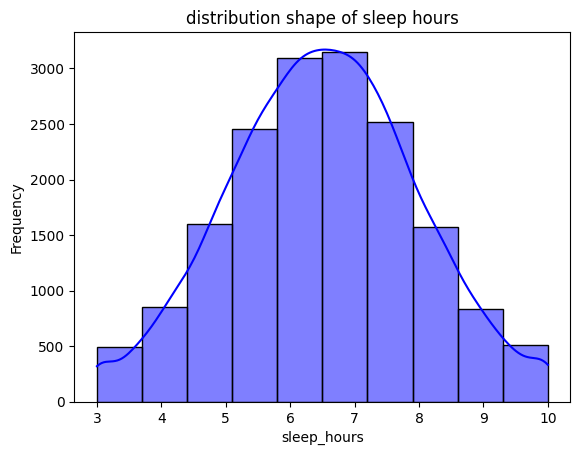

In [26]:
#q3. What’s the distribution shape of sleep hours
dist = data1['sleep_hours']

sns.histplot(data1['sleep_hours'], kde=True, bins=10, color='blue')
plt.title('distribution shape of sleep hours')
plt.ylabel('Frequency')
plt.show()

**Interpretation**

-The histogram is symmetric and bell-shaped.
-It is centered around 6 to 7 hours, with the frequency tapering off equally on both sides.

-The left and right tails appear nearly equal.

-There are no extreme outliers or significant skewness.

The distribution of sleep hours follows an approximately normal distribution, as indicated by its symmetric bell-shaped histogram. Most individuals get around 6 to 7 hours of sleep, with relatively few sleeping much more or much less.
